In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score

In [2]:
# Importing dataset
dataset = pd.read_csv('C:\\Users\\ppluc\\Downloads\\Dataset\\Mall_Customers.csv')
x = dataset.iloc[:,[3,4]].values

In [3]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# Finding the best value of CLUSTER_COUNT using Elbow method
from sklearn.cluster import KMeans
cluster_count_test = 10
wcss = []

for i in range(1,cluster_count_test+1):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans = kmeans.fit(x)
    wcss.append(kmeans.inertia_)

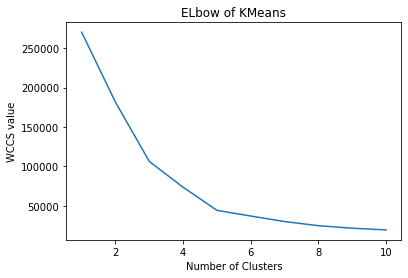

In [6]:
# Plot wccs values wrt number of clusters
plt.plot(np.arange(1,11),wcss)
plt.title('ELbow of KMeans')
plt.xlabel('Number of Clusters')
plt.ylabel('WCCS value')
plt.show()

In [4]:
# Applying kmeans with optimal number of clusters gained by Elbow method
cluster_count = 5
kmeans = KMeans(n_clusters=cluster_count,random_state=0)
kmeans = kmeans.fit(x)

y_pred = kmeans.predict(x) # predicted labels
centroids = kmeans.cluster_centers_

In [5]:
centroids

array([[ 25.14285714,  19.52380952],
       [ 78.03571429,  81.89285714],
       [ 80.18181818,  12.68181818],
       [ 25.0952381 ,  80.04761905],
       [108.18181818,  82.72727273],
       [ 47.29545455,  51.40909091],
       [109.7       ,  22.        ],
       [ 63.72093023,  46.1627907 ]])

In [9]:
y_pred

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2,
       0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

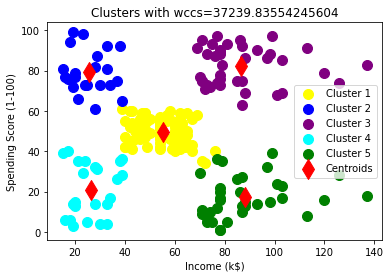

In [10]:
# Plot scatter of datapoints with their clusters
plt.scatter(x[y_pred==0,0],x[y_pred==0,1],s=100, c='yellow',label = 'Cluster 1')
plt.scatter(x[y_pred==1,0],x[y_pred==1,1],s=100, c='blue',label = 'Cluster 2')
plt.scatter(x[y_pred==2,0],x[y_pred==2,1],s=100, c='purple',label = 'Cluster 3')
plt.scatter(x[y_pred==3,0],x[y_pred==3,1],s=100, c='cyan',label = 'Cluster 4')
plt.scatter(x[y_pred==4,0],x[y_pred==4,1],s=100, c='green',label = 'Cluster 5')
plt.scatter(centroids[:,0],centroids[:,1],s=200, c='red',marker= 'd',label = 'Centroids')
plt.title('Clusters with wccs='+str(wcss[5]))
plt.xlabel('Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()